### Hoja de trabajo 8
### Sebastian Garcia 22291
### Jose Morales 22689

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
from scipy.stats import linregress
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import *
import sklearn.metrics as metrics
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV,Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from joblib import dump, load
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


from scipy.stats import chi2_contingency
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Leer datos de un csv #

In [2]:
archivo1_csv = "train.csv"
datost = pd.read_csv(archivo1_csv, encoding='ISO-8859-1')

# - Analisis Exploratorio #

# Resumen del set de datos #

In [4]:
datost.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
datost.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
datost.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Descripción de Columnas #

1. **Id**: Id con el que está identificada la casa. <br>
2. **MSSubClass**: Tipo de construcción de la propiedad (subclase). <br>
3. **MSZoning**: Zona de uso de la propiedad (residencial, comercial, etc.). <br>
4. **LotFrontage**: Longitud en pies de trozo de calle conectado a la propiedad. <br>
5. **LotArea**: Tamaño del lote en pies cuadrados. <br>
6. **Street**: Tipo de calle donde se encuentra la propiedad. <br>
7. **Alley**: Acceso a la propiedad desde una calle secundaria o callejón. <br>
8. **LotShape**: Forma general de la propiedad. <br>
9. **LandContour**: Planicidad de la propiedad (si es plana, en pendiente, etc.). <br>
10. **Utilities**: Tipo de utilidades disponibles para la propiedad (agua, electricidad, gas, etc.). <br>
11. **LotConfig**: Configuración del lote (si es esquina, interior, etc.). <br>
12. **LandSlope**: Pendiente del terreno (suave, moderado o empinado). <br>
13. **Neighborhood**: Localización de la propiedad en relación con las vecindades cercanas. <br>
14. **Condition1**: Proximidad a una calle principal o carretera. <br>
15. **Condition2**: Proximidad a una segunda calle o carretera si aplica. <br>
16. **BldgType**: Tipo de construcción de la vivienda (casa independiente, adosada, etc.). <br>
17. **HouseStyle**: Estilo arquitectónico de la vivienda. <br>
18. **OverallQual**: Calidad general de los materiales y productos terminados en la construcción. <br>
19. **OverallCond**: Calificación general de la condición del lugar (nuevo, bien mantenido, deteriorado, etc.). <br>
20. **YearBuilt**: Año de construcción de la casa. <br>
21. **YearRemodAdd**: Año en el que se hizo alguna remodelación significativa de la casa. <br>
22. **RoofStyle**: Tipo de techo de la propiedad. <br>
23. **RoofMatl**: Material utilizado en el techo de la vivienda. <br>
24. **Exterior1st**: Primer tipo de revestimiento exterior de la casa. <br>
25. **Exterior2nd**: Segundo tipo de revestimiento exterior si aplica. <br>
26. **MasVnrType**: Tipo de revestimiento de mampostería (piedra, ladrillo, etc.). <br>
27. **MasVnrArea**: Área del revestimiento de mampostería en pies cuadrados. <br>
28. **ExterQual**: Calidad del material exterior de la propiedad. <br>
29. **ExterCond**: Condición del material exterior de la propiedad. <br>
30. **Foundation**: Tipo de cimientos de la casa (ladrillo, hormigón, etc.). <br>
31. **BsmtQual**: Calidad del sótano (si es completo, tiene alta, media o baja calidad). <br>
32. **BsmtCond**: Condición general del sótano. <br>
33. **BsmtExposure**: Si las paredes del sótano están expuestas o a nivel de jardín o salida. <br>
34. **BsmtFinType1**: Calidad del área terminada del sótano. <br>
35. **BsmtFinSF1**: Pies cuadrados del área terminada del sótano. <br>
36. **BsmtFinType2**: Calidad de la segunda área terminada del sótano, si aplica. <br>
37. **BsmtFinSF2**: Pies cuadrados del área terminada de la segunda zona del sótano. <br>
38. **BsmtUnfSF**: Pies cuadrados del sótano sin terminar. <br>
39. **TotalBsmtSF**: Pies cuadrados totales del sótano. <br>
40. **Heating**: Tipo de calefacción de la casa. <br>
41. **HeatingQC**: Calidad y condición del sistema de calefacción. <br>
42. **CentralAir**: Si la propiedad cuenta con aire acondicionado central. <br>
43. **Electrical**: Tipo de sistema eléctrico de la vivienda. <br>
44. **1stFlrSF**: Pies cuadrados del primer piso de la casa. <br>
45. **2ndFlrSF**: Pies cuadrados del segundo piso de la casa. <br>
46. **LowQualFinSF**: Pies cuadrados con acabados de baja calidad en todos los pisos. <br>
47. **GrLivArea**: Pies cuadrados de superficie habitable sobre el nivel del suelo. <br>
48. **BsmtFullBath**: Número de baños completos en el sótano. <br>
49. **BsmtHalfBath**: Número de baños a medio terminar en el sótano. <br>
50. **FullBath**: Número de baños completos fuera del sótano. <br>
51. **HalfBath**: Número de baños a medio terminar fuera del sótano. <br>
52. **BedroomAbvGr**: Número de dormitorios fuera del sótano. <br>
53. **KitchenAbvGr**: Número de cocinas fuera del sótano. <br>
54. **KitchenQual**: Calidad de la cocina. <br>
55. **TotRmsAbvGrd**: Número total de habitaciones fuera del sótano. <br>
56. **Functional**: Calificación de la funcionalidad de la casa (por ejemplo, si la distribución es adecuada). <br>
57. **Fireplaces**: Número de chimeneas en la propiedad. <br>
58. **FireplaceQu**: Calidad de las chimeneas. <br>
59. **GarageType**: Ubicación del garaje (integrado, separado, etc.). <br>
60. **GarageYrBlt**: Año en el que fue construido el garaje. <br>
61. **GarageFinish**: Acabado interior del garaje. <br>
62. **GarageCars**: Número de coches que el garaje puede albergar. <br>
63. **GarageArea**: Tamaño del garaje en pies cuadrados. <br>
64. **GarageQual**: Calidad del garaje. <br>
65. **GarageCond**: Condición del garaje. <br>
66. **PavedDrive**: Si la propiedad tiene un camino pavimentado. <br>
67. **WoodDeckSF**: Área cubierta de madera en pies cuadrados. <br>
68. **OpenPorchSF**: Área del porche abierto en pies cuadrados. <br>
69. **EnclosedPorch**: Área cerrada del porche en pies cuadrados. <br>
70. **3SsnPorch**: Área del porche de tres estaciones. <br>
71. **ScreenPorch**: Área del porche con malla o red en pies cuadrados. <br>
72. **PoolArea**: Área de la piscina en pies cuadrados. <br>
73. **PoolQC**: Calidad de la piscina. <br>
74. **Fence**: Calidad de la cerca de la propiedad. <br>
75. **MiscFeature**: Características no cubiertas en otras categorías (por ejemplo, ascensor, terraza, etc.). <br>
76. **MiscVal**: Valor de las características adicionales no cubiertas en otras categorías. <br>
77. **MoSold**: Mes en el que se vendió la propiedad. <br>
78. **YrSold**: Año en el que se vendió la propiedad. <br>
79. **SaleType**: Tipo de venta de la propiedad (por ejemplo, venta normal, subasta, etc.). <br>
80. **SaleCondition**: Condición de la venta (por ejemplo, si fue una venta de remate o en condiciones especiales). <br>
81. **SalePrice**: Precio de venta de la casa. <br>


In [7]:
datost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
datost.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
datost.duplicated().sum()

np.int64(0)

# Obtenemos las columnas con datos Numericos #

In [3]:
# Obtener los nombres de las columnas numericas
columnas_numericas = datost.select_dtypes(include=['number']).columns.tolist()
columnas_numericas.remove('Id')

# Obtener los nombres de las columnas no numéricas
columnas_no_numericas = datost.select_dtypes(exclude=['number']).columns.tolist()
print("Columnas numéricas:")
print(columnas_numericas)

print("\nColumnas no numéricas:")
print(columnas_no_numericas)


numericast = datost[columnas_numericas]
#numericasp = datosp[columnas_numericas]



Columnas numéricas:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Columnas no numéricas:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu

# Obtenemos las columnas numericas con datos faltantes #

In [4]:
def count_empty_values_per_column(df):
    total_rows = len(df)
    missing_values = df.isna().sum()
    missing_values = missing_values[missing_values > 0]  # Filtrar solo columnas con valores faltantes
    
    if missing_values.empty:
        print("No hay valores faltantes en el DataFrame.")
    else:
        missing_percentage = (missing_values / total_rows) * 100
        missing_info = pd.DataFrame({
            'Valores Faltantes': missing_values,
            'Proporción (%)': missing_percentage
        })
        print("Número de valores faltantes por columna y su proporción respecto al total de filas:")
        print(missing_info)

#Columnas del df de train con filas vacias
count_empty_values_per_column(numericast)

Número de valores faltantes por columna y su proporción respecto al total de filas:
             Valores Faltantes  Proporción (%)
LotFrontage                259       17.739726
MasVnrArea                   8        0.547945
GarageYrBlt                 81        5.547945


Las variables que parecen podrian describir mejor el modelo son las variables GrLivArea y OverallQual por lo que se generaran modelos lineales con dichas variables

In [5]:
# Seleccionar las variables clave
columnas_numericas = ['SalePrice','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd'
                      , 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                      'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
                      , 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt'
                      , 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
                      , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

datos_numericos = datost[columnas_numericas]  # Crear nuevo dataframe con las variables seleccionadas

# Mostrar las primeras filas para verificar
datos_numericos.head()



SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     208500          60         65.0     8450            7            5   
1     181500          20         80.0     9600            6            8   
2     223500          60         68.0    11250            7            5   
3     140000          70         60.0     9550            7            5   
4     250000          60         84.0    14260            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0       2003          2003       196.0         706  ...         548   
1       1976          1976         0.0         978  ...         460   
2       2001          2002       162.0         486  ...         608   
3       1915          1970         0.0         216  ...         642   
4       2000          2000       350.0         655  ...         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  MoSold  YrSold  
0        0       2    2008  
1        0       5    2007  
2        0       9    2008  
3        0       2    2006  
4        0      12    2008  

[5 rows x 37 columns]

In [6]:
columnas_no_numericas = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


letras = datost[columnas_no_numericas]
letras.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

Vemos valores nulos o repetidos que tiene nuestro conjunto de datos y los sustituimos por la mediana.

In [7]:
print("Valores nulos por columna:")
print(datos_numericos.isnull().sum())

# Verificar valores duplicados
print("\nNúmero de filas duplicadas:")
print(datos_numericos.duplicated().sum())




Valores nulos por columna:
SalePrice          0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

Número de filas duplicadas:
0


# Sustituimos los valores numericos por la mediana #

In [8]:
# Reemplazar valores nulos con la mediana de cada columna
# Para columnas numéricas, sustituimos los valores nulos por la mediana

datost.fillna({'LotFrontage' : datost['LotFrontage'].median()}, inplace=True)
datost.fillna({'GarageYrBlt' : datost['GarageYrBlt'].median()}, inplace=True)
#datost['GarageYrBlt'].fillna(datost['GarageYrBlt'].median(), inplace=True)
# Verificar nuevamente los valores nulos después de reemplazarlos
print("\nValores nulos después de reemplazar con la mediana:")
print(datos_numericos.isnull().sum())


Valores nulos después de reemplazar con la mediana:
SalePrice          0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64


In [9]:
print("Valores nulos por columna en datos categóricos:")
print(letras.isnull().sum())




Valores nulos por columna en datos categóricos:
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype:

# Sustituimos los valores nulos por la moda #

In [10]:
datost.fillna({'Alley': datost['Alley'].mode()[0]}, inplace=True)
datost.fillna({'MasVnrType': datost['MasVnrType'].mode()[0]}, inplace=True)
datost.fillna({'BsmtQual': datost['BsmtQual'].mode()[0]}, inplace=True)
datost.fillna({'BsmtCond': datost['BsmtCond'].mode()[0]}, inplace=True)
datost.fillna({'BsmtExposure': datost['BsmtExposure'].mode()[0]}, inplace=True)
datost.fillna({'BsmtFinType1': datost['BsmtFinType1'].mode()[0]}, inplace=True)
datost.fillna({'BsmtFinType2': datost['BsmtFinType2'].mode()[0]}, inplace=True)
datost.fillna({'FireplaceQu': datost['FireplaceQu'].mode()[0]}, inplace=True)
datost.fillna({'GarageType': datost['GarageType'].mode()[0]}, inplace=True)
datost.fillna({'GarageFinish': datost['GarageFinish'].mode()[0]}, inplace=True)
datost.fillna({'GarageQual': datost['GarageQual'].mode()[0]}, inplace=True)
datost.fillna({'GarageCond': datost['GarageCond'].mode()[0]}, inplace=True)
datost.fillna({'PoolQC': datost['PoolQC'].mode()[0]}, inplace=True)
datost.fillna({'Fence': datost['Fence'].mode()[0]}, inplace=True)
datost.fillna({'MiscFeature': datost['MiscFeature'].mode()[0]}, inplace=True)



# Verificar nuevamente los valores nulos
print("\nValores nulos después de reemplazar con la moda:")
print(datost.isnull().sum())


Valores nulos después de reemplazar con la moda:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


# Verificamos si nuestro dataset sigue con valores nulos #

In [18]:
datost.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

<p> Se puede observar que ya no cuenta con valores nulos, procedemos a trabajar con el dataset para el analisis </p>

# Preprocesamiento del dataset <br>
# Matriz de correlación #

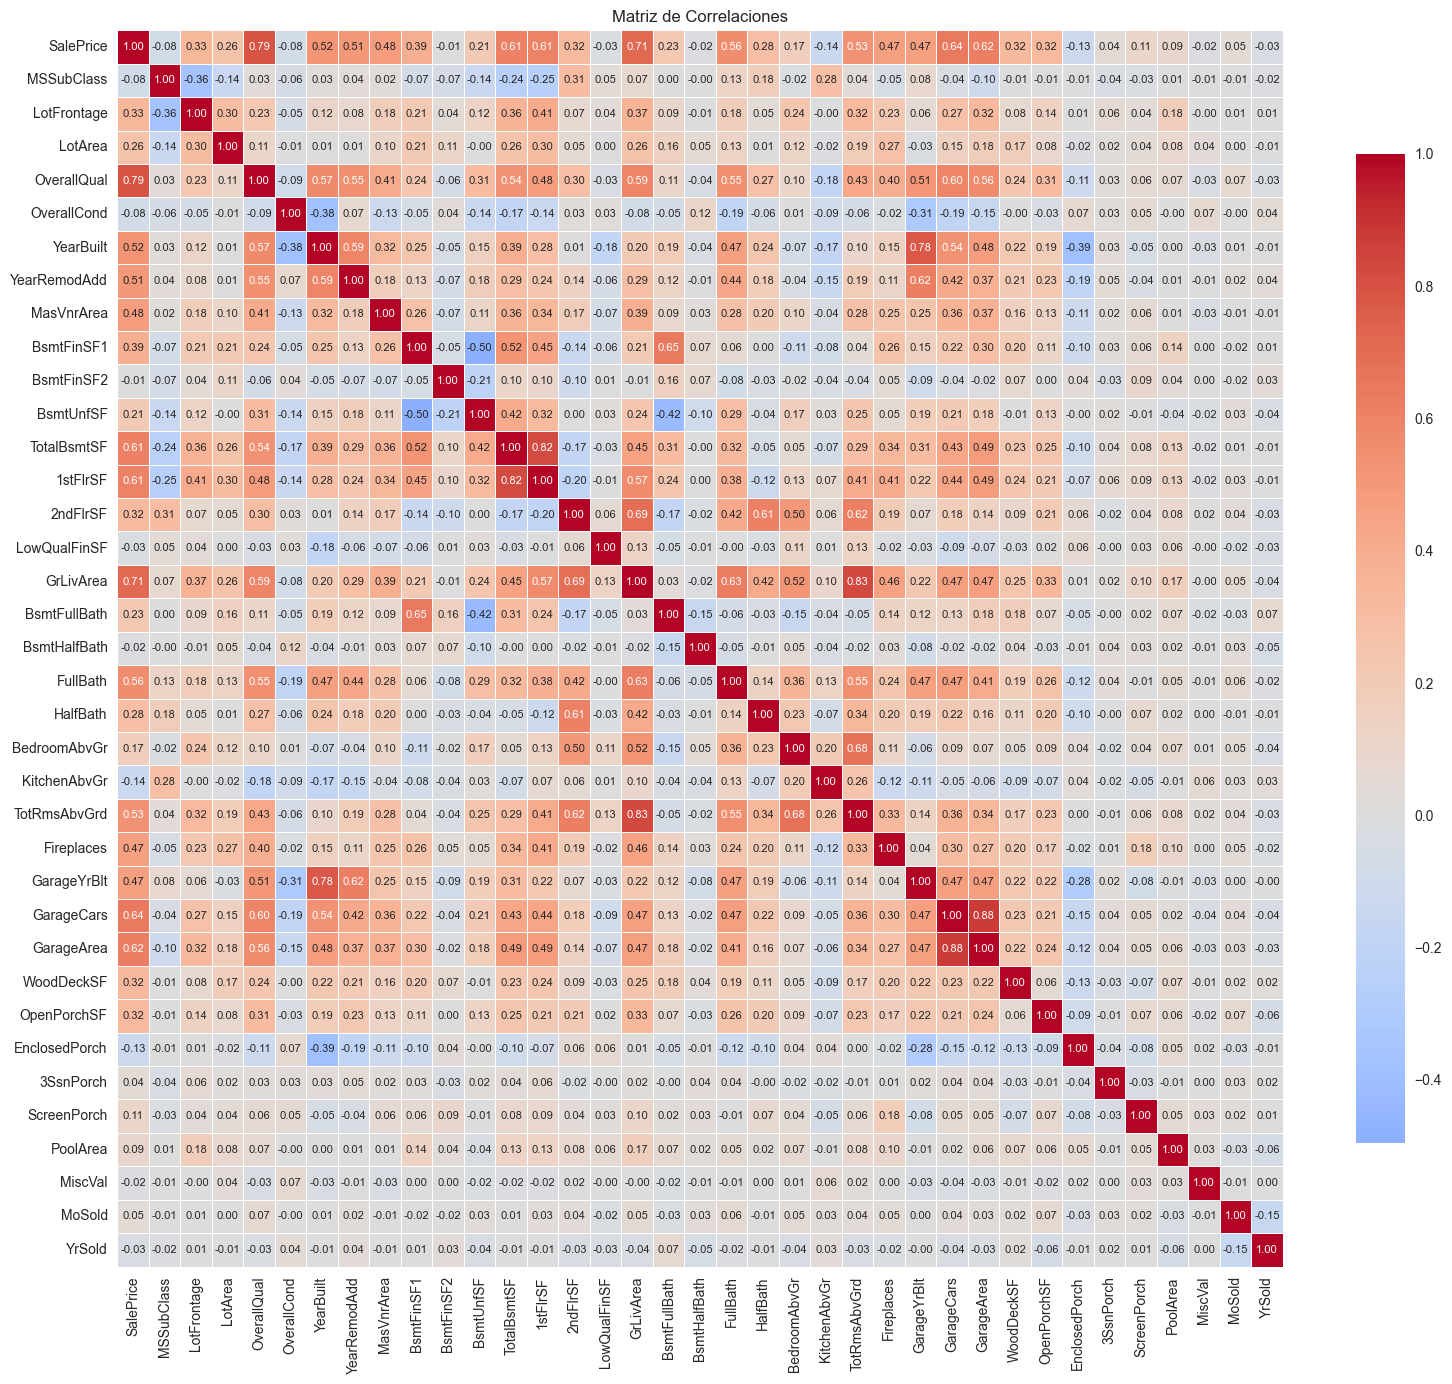

In [19]:

# Calcular matriz de correlaciones
corr_matrix = datost[columnas_numericas].corr()

plt.figure(figsize=(16, 14))

# Crear el heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            cbar_kws={'shrink': 0.8},  # Reducir el tamaño de la barra de color
            annot_kws={'size': 8},  # Reducir el tamaño de la fuente de los números
            linewidths=0.5)


plt.xticks(rotation=90)  # Rota las etiquetas del eje X
plt.yticks(rotation=0)   # Rota las etiquetas del eje Y (si es necesario)


plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(datos_numericos)
X_scaled = pd.DataFrame(X_scaled, columns=datos_numericos.columns)

<p>Observando la matriz de correlacíon podemos ver que hay varias columnas que no tienen una buena correlación con la variable SalePrice, la cual es la que nos interesa evaluar para los futuros modelos, por lo tanto solamente trabajaremos con: </p>

SalePrice,OverallQual ,GrLivArea,GarageCars


<p> Se puede observar que las columnas que vamos a utilizar no tienen valores nulos, por lo tanto no hay que corregir el dataframe. </p>

In [11]:
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

numeric_columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']

# Filtrando el DataFrame para obtener solo las columnas que te interesan
columns_to_select = categorical_columns + numeric_columns
datost = datost[columns_to_select]

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datost[numeric_columns] = scaler.fit_transform(datost[numeric_columns])

In [13]:
# Verificar que ambas tablas tienen la misma cantidad de filas
print("\nFilas en datos numéricos:", len(datos_numericos))
print("Filas en datos categóricos:", len(letras))

#columnas_usar = ["SalePrice","OverallQual" ,"GrLivArea","GarageCars"]


# Unir ambos datasets
datos_limpiados = datost.copy()
datos_limpiados2 = datos_limpiados.copy()

# Mostrar el resultado final
print("\nDatos combinados después de la limpieza:")
datos_limpiados.head()



Filas en datos numéricos: 1460
Filas en datos categóricos: 1460

Datos combinados después de la limpieza:


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  Grvl      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  Grvl      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  Grvl      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  Grvl      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... PavedDrive PoolQC  Fence MiscFeature SaleType  \
0      CollgCr       Norm  ...          Y     Gd  MnPrv        Shed       WD   
1      Veenker      Feedr  ...          Y     Gd  MnPrv        Shed       WD   
2      CollgCr       Norm  ...          Y     Gd  MnPrv        Shed       WD   
3      Crawfor       Norm  ...          Y     Gd  MnPrv        Shed       WD   
4      NoRidge       Norm  ...          Y     Gd  MnPrv        Shed       WD   

  SaleCondition SalePrice OverallQual GrLivArea GarageCars  
0        Normal  0.347273    0.651479  0.370333   0.311725  
1        Normal  0.007288   -0.071836 -0.482512   0.311725  
2        Normal  0.536154    0.651479  0.515013   0.311725  
3       Abnorml -0.515281    0.651479  0.383659   1.650307  
4        Normal  0.869843    1.374795  1.299326   1.650307  

[5 rows x 47 columns]

# Analisis para observar que variables categoricas son las mejores para el modelo #

In [14]:
from sklearn.feature_selection import f_classif

# Aplica ANOVA a cada variable categórica
anova_scores = []
for col in categorical_columns:
    X_cat = datos_limpiados[col].astype('category').cat.codes.values.reshape(-1, 1)
    f_score, _ = f_classif(X_cat, datos_limpiados['SalePrice'])
    anova_scores.append(f_score[0])

for col, score in zip(categorical_columns, anova_scores):
    print(f"{col}: {score}")

MSZoning: 1.7427925033233271
Street: 1.8707163691968878
Alley: 1.0829665591311617
LotShape: 1.4040637070125206
LandContour: 1.0793229273003802
Utilities: 0.23979596482992555
LotConfig: 0.9605177757733244
LandSlope: 1.1951228349694856
Neighborhood: 1.2504812992396086
Condition1: 0.7777434917901039
Condition2: 1.53690833279312
BldgType: 1.023017198116637
HouseStyle: 1.0396859243806844
RoofStyle: 1.1735913279300674
RoofMatl: 1.0687849226292692
Exterior1st: 0.9812420008434056
Exterior2nd: 1.0138333008684413
MasVnrType: 1.9702413882048169
ExterQual: 3.7748828876663105
ExterCond: 0.869631122792361
Foundation: 1.4988459189847005
BsmtQual: 3.0119378419272
BsmtCond: 0.9979438597722142
BsmtExposure: 1.3802654589121763
BsmtFinType1: 0.9808357448129525
BsmtFinType2: 0.8564053810613717
Heating: 1.4797213891452388
HeatingQC: 1.2876555108870527
CentralAir: 1.5722758791235756
Electrical: 1.1286839937138475
KitchenQual: 2.9047453946078408
Functional: 0.8039921226528484
FireplaceQu: 1.1879001573578267
G

In [15]:
categoricas_utilziar= [
    "ExterQual",
    "BsmtQual",
    "KitchenQual",
    "GarageFinish",
    "MasVnrType",
    "MSZoning",
    "Street",
    "Condition2",
    "CentralAir"
]

datos_limpiados = datos_limpiados[categoricas_utilziar + numeric_columns]

datos_limpiados.dtypes

ExterQual        object
BsmtQual         object
KitchenQual      object
GarageFinish     object
MasVnrType       object
MSZoning         object
Street           object
Condition2       object
CentralAir       object
SalePrice       float64
OverallQual     float64
GrLivArea       float64
GarageCars      float64
dtype: object

In [64]:
datos_limpiados3 = datos_limpiados.copy()

In [26]:
datos_limpiados3.describe()

SalePrice   OverallQual     GrLivArea    GarageCars
count  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03
mean   1.362685e-16  1.387018e-16 -1.277517e-16  1.216683e-16
std    1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00
min   -1.838704e+00 -3.688413e+00 -2.249120e+00 -2.365440e+00
25%   -6.415162e-01 -7.951515e-01 -7.347485e-01 -1.026858e+00
50%   -2.256643e-01 -7.183611e-02 -9.797004e-02  3.117246e-01
75%    4.165294e-01  6.514792e-01  4.974036e-01  3.117246e-01
max    7.228819e+00  2.821425e+00  7.855574e+00  2.988889e+00

<P> Se puede observar que los datos tienen la mayoria valores muy similares, por lo tanto no hay que hacer modificaciones para el modelo. </p>

# Creacion de la variable categorica/respuesta PriceType  #

In [108]:
# Calcular los percentiles 33 y 66
p33 = datos_limpiados3['SalePrice'].quantile(0.33)
p66 = datos_limpiados3['SalePrice'].quantile(0.66)

# Crear la nueva variable categórica
def categorizar_precio(precio):
    if precio <= p33:
        return 'Economicas'
    elif precio <= p66:
        return 'Intermedias'
    else:
        return 'Caras'

# Aplicar la función al dataframe
datos_limpiados3['PriceType'] = datos_limpiados3['SalePrice'].apply(categorizar_precio)

print(datos_limpiados3[['SalePrice', 'PriceType']])
print('Percentil 33: ', p33, 'Percentil 66: ', p66 )

      SalePrice    PriceType
0      0.347273        Caras
1      0.007288  Intermedias
2      0.536154        Caras
3     -0.515281  Intermedias
4      0.869843        Caras
...         ...          ...
1455  -0.074560  Intermedias
1456   0.366161        Caras
1457   1.077611        Caras
1458  -0.488523  Intermedias
1459  -0.420841  Intermedias

[1460 rows x 2 columns]
Percentil 33:  -0.5278730946497413 Percentil 66:  0.11297325611370197


In [109]:
datos_limpiados3.groupby('PriceType').size()

PriceType
Caras          497
Economicas     483
Intermedias    480
dtype: int64

In [29]:
datos_limpiados3['PriceType']

0             Caras
1       Intermedias
2             Caras
3       Intermedias
4             Caras
           ...     
1455    Intermedias
1456          Caras
1457          Caras
1458    Intermedias
1459    Intermedias
Name: PriceType, Length: 1460, dtype: object

In [110]:
target = datos_limpiados3.pop('PriceType')
data = datos_limpiados3


In [111]:
import random
random.seed(123)
data_train, data_test,target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data_train.columns

Index(['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish', 'MasVnrType',
       'MSZoning', 'Street', 'Condition2', 'CentralAir', 'SalePrice',
       'OverallQual', 'GrLivArea', 'GarageCars'],
      dtype='object')

In [69]:
nombre_categoricas = [
    "ExterQual",
    "BsmtQual",
    "KitchenQual",
    "GarageFinish",
    "MasVnrType",
    "MSZoning",
    "Street",
    "Condition2",
    "CentralAir"
]

nombre_numericas = [
    "SalePrice",
    "OverallQual",
    "GrLivArea",
    "GarageCars"
]

categoricas = data[nombre_categoricas]
numericas = data[nombre_numericas]
from sklearn.impute import SimpleImputer

# Preprocesamiento #

In [112]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Se preparan los preprocesadores
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")


#Se transforman las colunas usando los preprocesadores
from sklearn.compose import ColumnTransformer

preprocesador = ColumnTransformer([
    ('one_hot_encoder',categorical_preprocessor,nombre_categoricas),
    ('numerico', numeric_preprocessor,nombre_numericas)
],remainder="passthrough")

pipeline = Pipeline([
    ('preprocesador', preprocesador),
    ('modelo', LogisticRegression())
])

# Modelo 1 #

In [113]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
modelo = make_pipeline(preprocesador, SVC(kernel="linear"))

# Esto nos permite ver dentro del modelo
from sklearn import set_config
set_config(display='diagram')
modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ExterQual', 'BsmtQual',
                                                   'KitchenQual',
                                                   'GarageFinish', 'MasVnrType',
                                                   'MSZoning', 'Street',
                                                   'Condition2',
                                                   'CentralAir']),
                                                 ('numerico',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SalePrice', 'OverallQual',
                                                   'GrLivArea',
                                                   'GarageCars'])])),
                ('svc', SVC(kernel='linear'))])

Modelo evaluado en conjunto de prueba

In [114]:
_=modelo.fit(data_train,target_train)

In [115]:
modelo.score(data_test,target_test)

0.9429223744292238

In [116]:
target_pred = modelo.predict(data_test)
print(target_pred)
print ("Accuracy:",metrics.accuracy_score(target_test, target_pred))
print ("Precision:", metrics.precision_score(target_test,target_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(target_test,target_pred,average='weighted'))


['Intermedias' 'Intermedias' 'Economicas' 'Caras' 'Intermedias'
 'Intermedias' 'Intermedias' 'Intermedias' 'Caras' 'Intermedias'
 'Economicas' 'Intermedias' 'Caras' 'Caras' 'Caras' 'Intermedias'
 'Economicas' 'Intermedias' 'Economicas' 'Economicas' 'Intermedias'
 'Caras' 'Caras' 'Caras' 'Intermedias' 'Economicas' 'Economicas' 'Caras'
 'Caras' 'Caras' 'Economicas' 'Intermedias' 'Intermedias' 'Intermedias'
 'Intermedias' 'Caras' 'Economicas' 'Economicas' 'Caras' 'Intermedias'
 'Caras' 'Intermedias' 'Economicas' 'Intermedias' 'Intermedias'
 'Economicas' 'Intermedias' 'Economicas' 'Intermedias' 'Caras' 'Caras'
 'Economicas' 'Caras' 'Intermedias' 'Intermedias' 'Caras' 'Economicas'
 'Caras' 'Economicas' 'Intermedias' 'Economicas' 'Caras' 'Intermedias'
 'Caras' 'Caras' 'Intermedias' 'Intermedias' 'Economicas' 'Economicas'
 'Economicas' 'Intermedias' 'Intermedias' 'Caras' 'Caras' 'Caras'
 'Economicas' 'Economicas' 'Caras' 'Caras' 'Economicas' 'Economicas'
 'Intermedias' 'Economicas' 'Intermedi

In [117]:
confusion_matrix(target_pred, target_test)

array([[150,   0,   2],
       [  0, 131,   8],
       [  6,   9, 132]])

Modelo evaluado en conjunto de entrenamiento

In [118]:
_=modelo.fit(data_train,target_train)

In [119]:
modelo.score(data_train,target_train)

0.9725759059745348

In [120]:
target_pred = modelo.predict(data_train)
print(target_pred)
print ("Accuracy:",metrics.accuracy_score(target_train, target_pred))
print ("Precision:", metrics.precision_score(target_train,target_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(target_train,target_pred,average='weighted'))

['Caras' 'Caras' 'Economicas' ... 'Economicas' 'Caras' 'Intermedias']
Accuracy: 0.9725759059745348
Precision: 0.9726572922572266
Recall:  0.9725759059745348


In [121]:
confusion_matrix(target_pred, target_train)

array([[333,   0,   4],
       [  0, 338,  12],
       [  8,   4, 322]])

El modelo 1 no parece sufrir de overfitting, ni underfitting dado a que las metricas del modelo para el conjunto de entrenamiento como el de prueba indican que se predice bien el modelo y son similares.

# Modelo 2 #

In [122]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
modelo2 = make_pipeline(preprocesador, SVC(kernel="rbf"))

# Esto nos permite ver dentro del modelo
from sklearn import set_config
set_config(display='diagram')
modelo2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ExterQual', 'BsmtQual',
                                                   'KitchenQual',
                                                   'GarageFinish', 'MasVnrType',
                                                   'MSZoning', 'Street',
                                                   'Condition2',
                                                   'CentralAir']),
                                                 ('numerico',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SalePrice', 'OverallQual',
                                                   'GrLivArea',
                                                   'GarageCars'])])),
                ('svc', SVC())])

Modelo evaluado en conjunto de prueba

In [123]:
_=modelo2.fit(data_train,target_train)

In [124]:

modelo2.score(data_test,target_test)

0.908675799086758

In [125]:
target_pred2 = modelo2.predict(data_test)
print(target_pred2)
print ("Accuracy:",metrics.accuracy_score(target_test, target_pred2))
print ("Precision:", metrics.precision_score(target_test,target_pred2,average='weighted') )
print ("Recall: ", metrics.recall_score(target_test,target_pred2,average='weighted'))


['Intermedias' 'Intermedias' 'Economicas' 'Caras' 'Intermedias'
 'Intermedias' 'Intermedias' 'Intermedias' 'Caras' 'Intermedias'
 'Economicas' 'Intermedias' 'Caras' 'Intermedias' 'Caras' 'Intermedias'
 'Economicas' 'Intermedias' 'Intermedias' 'Economicas' 'Intermedias'
 'Caras' 'Caras' 'Caras' 'Intermedias' 'Economicas' 'Economicas' 'Caras'
 'Caras' 'Caras' 'Economicas' 'Intermedias' 'Intermedias' 'Caras'
 'Intermedias' 'Caras' 'Intermedias' 'Economicas' 'Caras' 'Intermedias'
 'Caras' 'Intermedias' 'Economicas' 'Intermedias' 'Intermedias'
 'Economicas' 'Intermedias' 'Economicas' 'Intermedias' 'Intermedias'
 'Caras' 'Economicas' 'Intermedias' 'Economicas' 'Intermedias' 'Caras'
 'Economicas' 'Caras' 'Economicas' 'Intermedias' 'Intermedias' 'Caras'
 'Intermedias' 'Caras' 'Caras' 'Intermedias' 'Intermedias' 'Economicas'
 'Intermedias' 'Economicas' 'Intermedias' 'Caras' 'Caras' 'Caras' 'Caras'
 'Economicas' 'Economicas' 'Caras' 'Caras' 'Economicas' 'Economicas'
 'Economicas' 'Economicas' 'I

In [126]:
confusion_matrix(target_pred2, target_test)

array([[146,   0,   5],
       [  0, 126,  11],
       [ 10,  14, 126]])

Modelo evaluado en conjunto de entrenamiento

In [127]:
_=modelo2.fit(data_train,target_train)

In [128]:
modelo2.score(data_train,target_train)

0.940254652301665

In [129]:
target_pred2 = modelo2.predict(data_train)
print(target_pred2)
print ("Accuracy:",metrics.accuracy_score(target_train, target_pred2))
print ("Precision:", metrics.precision_score(target_train,target_pred2,average='weighted') )
print ("Recall: ", metrics.recall_score(target_train,target_pred2,average='weighted'))

['Caras' 'Caras' 'Economicas' ... 'Economicas' 'Caras' 'Intermedias']
Accuracy: 0.940254652301665
Precision: 0.9405126135829766
Recall:  0.940254652301665


In [130]:
confusion_matrix(target_pred2, target_train)

array([[321,   0,  10],
       [  0, 335,  24],
       [ 20,   7, 304]])

El modelo 2 no parece sufrir de overfitting, ni underfitting dado a que las metricas del modelo para el conjunto de entrenamiento como el de prueba indican que se predice bien el modelo y son similares.

# Modelo 3 #

In [131]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
modelo3 = make_pipeline(preprocesador, SVC(kernel="sigmoid"))

# Esto nos permite ver dentro del modelo
from sklearn import set_config
set_config(display='diagram')
modelo3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ExterQual', 'BsmtQual',
                                                   'KitchenQual',
                                                   'GarageFinish', 'MasVnrType',
                                                   'MSZoning', 'Street',
                                                   'Condition2',
                                                   'CentralAir']),
                                                 ('numerico',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SalePrice', 'OverallQual',
                                                   'GrLivArea',
                                                   'GarageCars'])])),
                ('svc', SVC(kernel='sigmoid'))])

Modelo evaluado en conjunto de prueba

In [132]:
_=modelo3.fit(data_train,target_train)

In [133]:
modelo3.score(data_test,target_test)

0.860730593607306

In [134]:
target_pred3 = modelo3.predict(data_test)
print(target_pred3)
print ("Accuracy:",metrics.accuracy_score(target_test, target_pred3))
print ("Precision:", metrics.precision_score(target_test,target_pred3,average='weighted') )
print ("Recall: ", metrics.recall_score(target_test,target_pred3,average='weighted'))


['Intermedias' 'Intermedias' 'Economicas' 'Caras' 'Intermedias'
 'Intermedias' 'Intermedias' 'Intermedias' 'Caras' 'Intermedias'
 'Economicas' 'Intermedias' 'Caras' 'Intermedias' 'Caras' 'Intermedias'
 'Economicas' 'Intermedias' 'Economicas' 'Economicas' 'Intermedias'
 'Caras' 'Caras' 'Intermedias' 'Intermedias' 'Economicas' 'Economicas'
 'Caras' 'Caras' 'Caras' 'Economicas' 'Intermedias' 'Intermedias' 'Caras'
 'Economicas' 'Caras' 'Economicas' 'Economicas' 'Caras' 'Intermedias'
 'Caras' 'Intermedias' 'Economicas' 'Intermedias' 'Intermedias'
 'Economicas' 'Economicas' 'Economicas' 'Economicas' 'Intermedias' 'Caras'
 'Economicas' 'Intermedias' 'Economicas' 'Intermedias' 'Caras'
 'Economicas' 'Caras' 'Economicas' 'Intermedias' 'Intermedias' 'Caras'
 'Intermedias' 'Caras' 'Caras' 'Economicas' 'Intermedias' 'Economicas'
 'Intermedias' 'Economicas' 'Intermedias' 'Caras' 'Caras' 'Caras' 'Caras'
 'Economicas' 'Economicas' 'Caras' 'Caras' 'Economicas' 'Economicas'
 'Economicas' 'Economicas' 'I

In [135]:
confusion_matrix(target_pred3, target_test)

array([[142,   0,   6],
       [  0, 124,  25],
       [ 14,  16, 111]])

Modelo evaluado en conjunto de entrenamiento

In [136]:
_=modelo3.fit(data_train,target_train)

In [137]:
modelo3.score(data_train,target_train)

0.8922624877571009

In [138]:
target_pred3 = modelo3.predict(data_train)
print(target_pred3)
print ("Accuracy:",metrics.accuracy_score(target_train, target_pred3))
print ("Precision:", metrics.precision_score(target_train,target_pred3,average='weighted') )
print ("Recall: ", metrics.recall_score(target_train,target_pred3,average='weighted'))

['Caras' 'Caras' 'Economicas' ... 'Economicas' 'Caras' 'Economicas']
Accuracy: 0.8922624877571009
Precision: 0.8938927495172302
Recall:  0.8922624877571009


In [139]:
confusion_matrix(target_pred3, target_train)

array([[320,   0,  15],
       [  0, 326,  58],
       [ 21,  16, 265]])

El modelo 3 no parece sufrir de overfitting, ni underfitting dado a que las metricas del modelo para el conjunto de entrenamiento como el de prueba indican que se predice bien el modelo y son similares.

# Comparacion con otros modelos #

El primer modelo realizado con SVM es el mejor con una precision de 96% comparado con los otros 2 modelos utilizando SVM. Este predice mejor que otros modelos utilizados cometiendo errores en las mismas areas pero con menor frecuencia, este ademas no parece tener un tiempo de ejecucion significativamente mayor que el resto de modelos.

# Modelo de regresion #

In [140]:
pipeline.fit(data_train, target_train)
y_pred_modelo1 = pipeline.predict(data_test)


In [141]:
# Paso 1: Convertir target a numérico (ejemplo con mapeo)
target_mapping = {'Economicas': 1.0, 'Intermedias': 2.0, 'Caras': 3.0}  # Asigna valores numéricos
target = target.map(target_mapping)

# Paso 2: Dividir los datos (ahora target es numérico)
data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.3, random_state=123
)

# Paso 3: Entrenar pipeline (con LinearRegression)
pipeline.fit(data_train, target_train)
y_pred_modelo1 = pipeline.predict(data_test)

# Paso 4: Calcular métricas (regresión)
modelo_final = pipeline.named_steps['modelo']

explained_variance_modelo1 = metrics.explained_variance_score(target_test, y_pred_modelo1)
mean_absolute_error_modelo1 = metrics.mean_absolute_error(target_test, y_pred_modelo1) 
mse_modelo1 = metrics.mean_squared_error(target_test, y_pred_modelo1)
median_absolute_error_modelo1 = metrics.median_absolute_error(target_test, y_pred_modelo1)
r2_modelo1 = metrics.r2_score(target_test, y_pred_modelo1)

n = len(target_test)  
k = modelo_final.coef_.size + 1  # +1 por el intercepto
aic_modelo1 = n * np.log(mse_modelo1) + 2 * k
bic_modelo1 = n * np.log(mse_modelo1) + k * np.log(n)

print('Explained Variance:', round(explained_variance_modelo1, 4))   
print('R²:', round(r2_modelo1, 4))
print('MAE:', round(mean_absolute_error_modelo1, 4))
print('MSE:', round(mse_modelo1, 4))
print('RMSE:', round(np.sqrt(mse_modelo1), 4))
print('AIC:', round(aic_modelo1, 4))
print('BIC:', round(bic_modelo1, 4))

Explained Variance: 0.9085
R²: 0.9072
MAE: 0.0616
MSE: 0.0616
RMSE: 0.2483
AIC: -984.4353
BIC: -502.7335


El modelo de regresión lineal demostró un excelente desempeño predictivo con un R² del 90.72%, superando incluso a otros algoritmos como el árbol de decisión (86% de precisión) y Naive Bayes (90%), aunque la regresión logística obtuvo un ligero mejor resultado (92%) en problemas de clasificación. Sin embargo, cabe destacar que la regresión lineal es significativamente más rápida y eficiente computacionalmente que la regresión logística, manteniendo además una gran interpretabilidad de los resultados. Mientras que Naive Bayes y KNN ofrecen ventajas en velocidad de ejecución, particularmente con grandes volúmenes de datos, la regresión lineal presenta el mejor equilibrio entre precisión, eficiencia y robustez para problemas de regresión. Para casos de clasificación, aunque la regresión logística alcanzó mayor precisión, su mayor tiempo de procesamiento podría ser un factor limitante en entornos donde la velocidad es crítica, haciendo que Naive Bayes sea una alternativa competitiva.